# Monte Carlo Integration: standard sampling, importance sampling, rejection sampling

Florent Leclercq,<br/>
Institute of Cosmology and Gravitation, University of Portsmouth,<br/>
florent.leclercq@polytechnique.org

In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
from matplotlib import pyplot as plt
%matplotlib inline
from math import sin,pi

## The target pdf

In [2]:
def target_pdf(x):
    return sin(x)*sin(x)
target_pdf=np.vectorize(target_pdf)

In [3]:
a=0.
b=pi
x_arr=np.linspace(a,b,100.)
f_arr=target_pdf(x_arr)

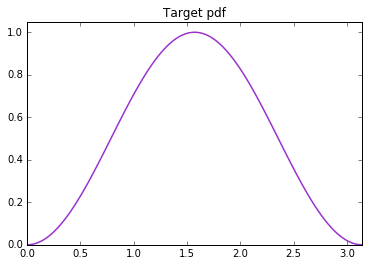

In [4]:
plt.xlim(a,b)
plt.ylim(0,1.05)
plt.plot(x_arr,f_arr,color='darkorchid',linewidth=1.5)
plt.title("Target pdf")
plt.show()

In [5]:
trueI=quad(target_pdf,a,b)[0]
trueI

1.5707963267948966

## Standard Monte Carlo integration

We directly draw samples from the target pdf.

In [6]:
Nsamp=100

In [7]:
randoms=np.random.uniform(a,b,Nsamp)
samples=target_pdf(randoms)

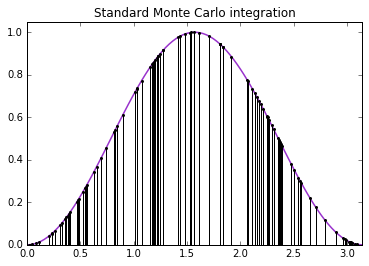

In [8]:
plt.xlim(a,b)
plt.ylim(0,1.05)
plt.plot(x_arr,f_arr,color='darkorchid',linewidth=1.5)
markerline, stemlines, baseline = plt.stem(randoms,samples)
plt.setp(markerline,color='black',markersize=3.,markeredgewidth=0.)
plt.setp(stemlines,color='black')
plt.title("Standard Monte Carlo integration")
plt.show()

In [9]:
StandardMonteCarloI=np.sum(samples)*(b-a)/Nsamp
StandardMonteCarloI

1.4676638629643894

## Importance sampling

We draw samples from a proposal pdf, designed to be as close as possible to the target pdf. We then assign each sample a weight proportional to its likelihood divided by its prior probability.

In [10]:
Nsamp=1000

In [11]:
proposal=norm(loc=(b-a)/2,scale=0.5)
proposal_pdf=proposal.pdf

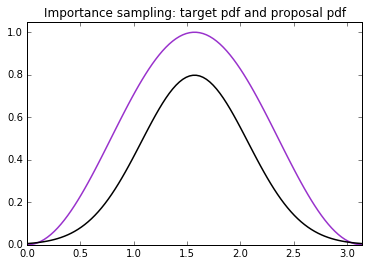

In [12]:
plt.xlim(a,b)
plt.ylim(0,1.05)
plt.plot(x_arr,f_arr,color='darkorchid',linewidth=1.5)
plt.plot(x_arr,proposal_pdf(x_arr),color='black',linewidth=1.5)
plt.title("Importance sampling: target pdf and proposal pdf")
plt.show()

In [13]:
samples=proposal.rvs(size=Nsamp)
weights=target_pdf(samples)/proposal_pdf(samples)

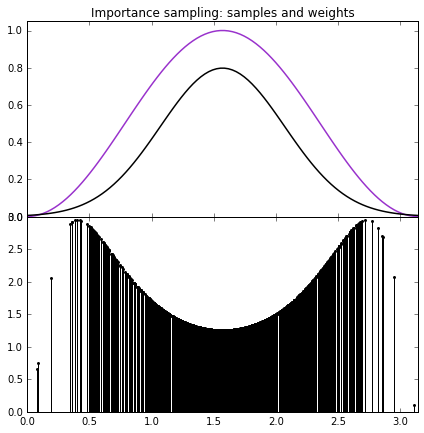

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7,7))
ax1.set_xlim(a,b)
ax1.set_ylim(0,1.05)
ax1.plot(x_arr,f_arr,color='darkorchid',linewidth=1.5)
ax1.plot(x_arr,proposal_pdf(x_arr),color='black',linewidth=1.5)
ax1.set_title("Importance sampling: samples and weights")
markerline, stemlines, baseline = ax2.stem(samples,weights,color='black')
plt.setp(markerline,color='black',markersize=3.,markeredgewidth=0.)
plt.setp(stemlines,color='black')
f.subplots_adjust(hspace=0)
plt.show()

In [15]:
ImportanceI=np.sum(weights)/Nsamp
ImportanceI

1.5853717219944932

## Importance resampling

A problem with importance sampling is the situation in which all but one of the weights are close to zero. To avoid with situation, we can do **importance resampling**. We draw Nresamp new samples from the current sample set with probabilities proportional to their weights. We replace the current samples with this new set, and the the current weights by 1/Nresamp (drawing according to the importance weight replaces likelihoods by frequencies).

In [16]:
Nresamp=500
normalizedweights=weights/np.sum(weights)
resamples=np.random.choice(samples, size=Nresamp, replace=True, p=normalizedweights)
reweights=1./Nresamp*np.ones(Nresamp)

Weights are then updated given their likelihood, as in the previous importance sampling step.

In [17]:
reweights*=target_pdf(resamples)/(1./Nresamp)

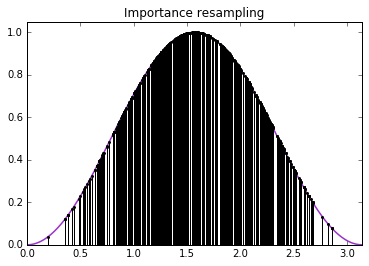

In [18]:
plt.xlim(a,b)
plt.ylim(0,1.05)
plt.plot(x_arr,f_arr,color='darkorchid',linewidth=1.5)
markerline, stemlines, baseline = plt.stem(resamples,reweights,color='black')
plt.setp(markerline, color='black', markersize=3., markeredgewidth = 0.)
plt.setp(stemlines, color='black')
plt.title("Importance resampling")
plt.show()

In [19]:
ImportanceReI=np.sum(resamples)/Nresamp
ImportanceReI

1.5781403615264031

Iterating this procedure yields the **Sequential Importance Resampling** (SIR) algorithm, which is a simple "*particle filter*" or "*Sequential Monte Carlo*" algorithm.

## Rejection sampling

In [20]:
Nsamp=1000

In [21]:
upperbound=1
xs=np.random.uniform(a,b,Nsamp)
ys=np.random.uniform(0,upperbound,Nsamp)

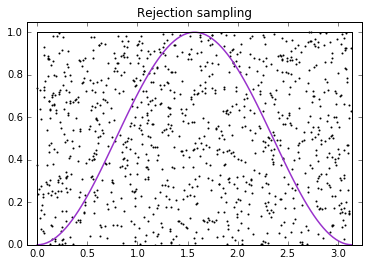

In [22]:
plt.xlim(a-0.1,b+0.1)
plt.ylim(0,1.05)
plt.plot(x_arr,f_arr,color='darkorchid',linewidth=1.5)
plt.scatter(xs,ys,s=4,marker='.',color='black')
plt.plot([a,b],[upperbound,upperbound],color='black')
plt.plot([a,a],[0,upperbound],color='black')
plt.plot([b,b],[0,upperbound],color='black')
plt.title("Rejection sampling")
plt.show()

In [23]:
randoms=xs[np.where(ys<=target_pdf(xs))]
samples=ys[np.where(ys<=target_pdf(xs))]

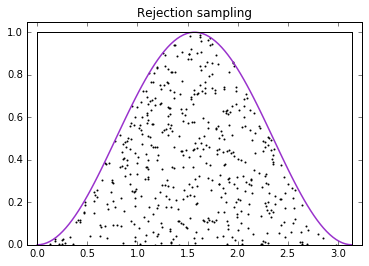

In [24]:
plt.xlim(a-0.1,b+0.1)
plt.ylim(0,1.05)
plt.plot(x_arr,f_arr,color='darkorchid',linewidth=1.5)
plt.scatter(randoms,samples,s=4,marker='.',color='black')
plt.plot([a,b],[upperbound,upperbound],color='black')
plt.plot([a,a],[0,upperbound],color='black')
plt.plot([b,b],[0,upperbound],color='black')
plt.title("Rejection sampling")
plt.show()

In [25]:
fraction=float(len(samples))/Nsamp
fraction

0.485

In [26]:
fraction=float(len(samples))/Nsamp
RejectionI=fraction*upperbound*(b-a)
RejectionI

1.5236724369910497